In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataset = pd.read_csv('/content/gdrive/My Drive/At a glance: Critical Care Unit/Ads_CTR_Optimisation.csv')

In [4]:
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


In [7]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0]*no_of_Ads
sums_of_rewards_of_each_ads = [0]*no_of_Ads
total_reward = 0
for n in range(0,observations):
   ad = 0
   max_upper_bound = 0
   for i in range(0,no_of_Ads):
     if(numbers_of_selections_of_each_ads[i] > 0):
        average_reward = sums_of_rewards_of_each_ads[i]/numbers_of_selections_of_each_ads[i]
        delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections_of_each_ads[i])
        upper_bound = average_reward + delta_i
     else:
        upper_bound = 1e400
     if upper_bound > max_upper_bound:
       max_upper_bound = upper_bound
       ad = i
     ads_selected.append(ad)
     numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + i
     reward = dataset.values[n,ad]
     sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
     total_reward = total_reward + reward

print("Reward by Ads = ", sums_of_rewards_of_each_ads)
print("Total Rewards by UCB = ", total_reward)
print("Ads selected at each reward : ",ads_selected)

Reward by Ads =  [11429, 576, 168, 347, 4496, 6, 210, 481, 107, 36]
Total Rewards by UCB =  17856
Ads selected at each reward :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 5, 5, 7, 8, 9, 0, 0, 0, 0, 4, 4, 6, 6, 8, 9, 0, 0, 2, 3, 3, 3, 3, 7, 7, 9, 0, 1, 1, 3, 3, 3, 3, 3, 3, 9, 0, 0, 2, 2, 2, 2, 2, 2, 8, 8, 0, 0, 0, 0, 0, 5, 5, 5, 5, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 2, 3, 3, 3, 3, 3, 8, 9, 0, 0, 0, 0, 0, 5, 5, 5, 8, 9, 0, 0, 2, 2, 2, 2, 2, 2, 8, 9, 0, 0, 0, 0, 0, 0, 6, 7, 7, 9, 0, 0, 0, 3, 3, 3, 6, 7, 7, 7, 0, 0, 0, 0, 4, 4, 6, 7, 7, 7, 0, 1, 1, 1, 1, 5, 6, 6, 8, 8, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

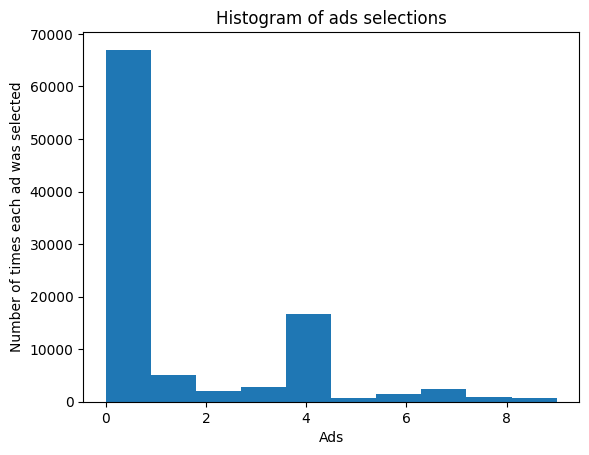

In [8]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()